In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
import os
from pathlib import Path
dir_path = Path(r"/Users/rabinatwayana/Rabina/CDE II/Wildfire Project/SAR-Burnt-Area-Mapping/")
if dir_path.exists():
    os.chdir(dir_path)
else:
    print("Directory does not exist! Please check the path.")


from pathlib import Path
folder_path = Path("MachineLearning/output/feature_importance/")
folder_path.mkdir(parents=True, exist_ok=True)

RandomForest_palisades_sar_avg_asc_desc_glcm.pkl


/Users/rabinatwayana/miniforge3/envs/wildfire_burnt_env/lib/python3.12/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/rabinatwayana/miniforge3/envs/wildfire_burnt_env/lib/python3.12/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[13.42045458 13.20696207  3.81434924 21.47959496 30.6395696   6.63175845
  7.82504615  2.98226495]
RandomForest_palisades_sar_single_asc_desc_glcm.pkl


/Users/rabinatwayana/miniforge3/envs/wildfire_burnt_env/lib/python3.12/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/rabinatwayana/miniforge3/envs/wildfire_burnt_env/lib/python3.12/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[ 6.33555558 21.6486878   6.95064537 48.63185568  7.63148478  3.3384258
  2.78084637  2.68249861]


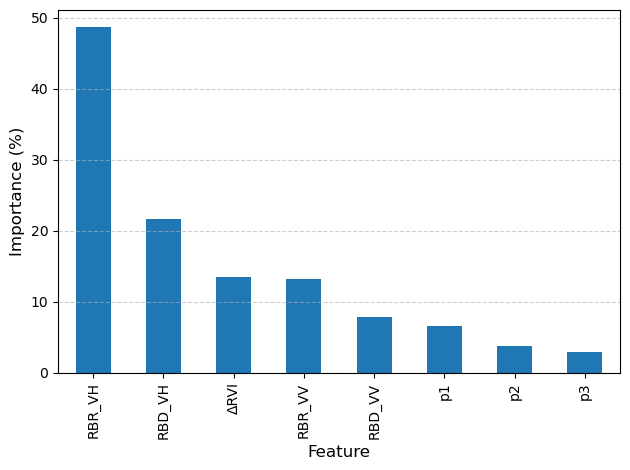

In [3]:
model_dir="MachineLearning/output/model/"
output_dir="MachineLearning/output/feature_importance/"

import os

model_files = ["RandomForest_palisades_sar_avg_asc_desc_glcm.pkl","RandomForest_palisades_sar_single_asc_desc_glcm.pkl"]
for file in model_files:
    print(file)
    model = joblib.load(model_dir+file)
    if "glcm" in file:
        feature_column_names=["RBD_VV", "RBD_VH", "RBR_VV", "RBR_VH", "ΔRVI", 'p1', 'p2', 'p3']
    else:
        feature_column_names=["RBD_VV", "RBD_VH", "RBR_VV", "RBR_VH", "ΔRVI"]
    print(model.feature_importances_*100)
    feature_importances = pd.Series(model.feature_importances_* 100, index=feature_column_names).sort_values(ascending=False)
    feature_importances.plot.bar()
    plt.ylabel("Importance (%)", fontsize=12)
    plt.xlabel("Feature", fontsize=12)

    # Title (optional)
    plt.title("", fontsize=14)

    # Grid and layout
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(output_dir+file.replace(".pkl",".png"), dpi=300, bbox_inches="tight")  # Change filename & format as needed